In [177]:
import pandas as pd 
import matplotlib.pyplot as plt 

df_erp = pd.read_excel('./Données/Fichier_erp.xlsx')
df_liaison = pd.read_excel('./Données/fichier_liaison.xlsx')
df_web = pd.read_excel('./Données/Fichier_web.xlsx')

pd.set_option('display.max_columns', 50)

d:\OpenClassRooms\env_ocr\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
d:\OpenClassRooms\env_ocr\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
d:\OpenClassRooms\env_ocr\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [178]:
print('erp :', '\n','colonnes :',df_erp.shape[1], df_erp.columns, '\n')
print('liaison :', '\n','colonnes :', df_liaison.shape[1], df_liaison.columns, '\n')
print('web :', '\n','colonnes :', df_web.shape[1],  df_web.columns, '\n')

erp : 
 colonnes : 5 Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status'], dtype='object') 

liaison : 
 colonnes : 2 Index(['product_id', 'id_web'], dtype='object') 

web : 
 colonnes : 28 Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object') 



---------------------------
# Nettoyage basique 

----------------------------

## erp 

In [179]:
print(df_erp.head(1), '\n')
print(df_erp.dtypes)

   product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock 

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [180]:
df_erp['product_id'] = df_erp['product_id'].astype(str)

7 fois plus de produits web référencés que de produits non web 

In [181]:
df_erp['onsale_web'].value_counts()

onsale_web
1    717
0    108
Name: count, dtype: int64

In [182]:
df_erp['onsale_web'] = df_erp['onsale_web'].astype(bool)

In [183]:
df_erp['product_id'].duplicated().sum()

0

In [184]:
df_erp['stock_quantity'].describe()

count    825.000000
mean      26.583030
std       45.875948
min       -1.000000
25%        1.000000
50%       11.000000
75%       34.000000
max      578.000000
Name: stock_quantity, dtype: float64

-1 ?? On va noter ces produits, mais c'est clairement une erreur 

On note l'écart net enter la moyenne des stocks (26) et la médiane (11)

In [185]:
df_erp[df_erp['stock_quantity'] == -1]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,False,10.0,-1,outofstock
573,5700,True,44.5,-1,outofstock


In [186]:
df_erp[df_erp['stock_quantity'] > 100].shape[0]

44

In [187]:
df_erp['stock_status'].value_counts()

stock_status
instock       638
outofstock    187
Name: count, dtype: int64

In [188]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,outofstock
1,3849,True,34.3,0,outofstock
2,3850,True,20.8,0,outofstock
3,4032,True,14.1,0,outofstock
4,4039,True,46.0,0,outofstock
...,...,...,...,...,...
820,7203,False,45.0,30,instock
821,7204,False,45.0,9,instock
822,7247,True,54.8,23,instock
823,7329,False,26.5,14,instock


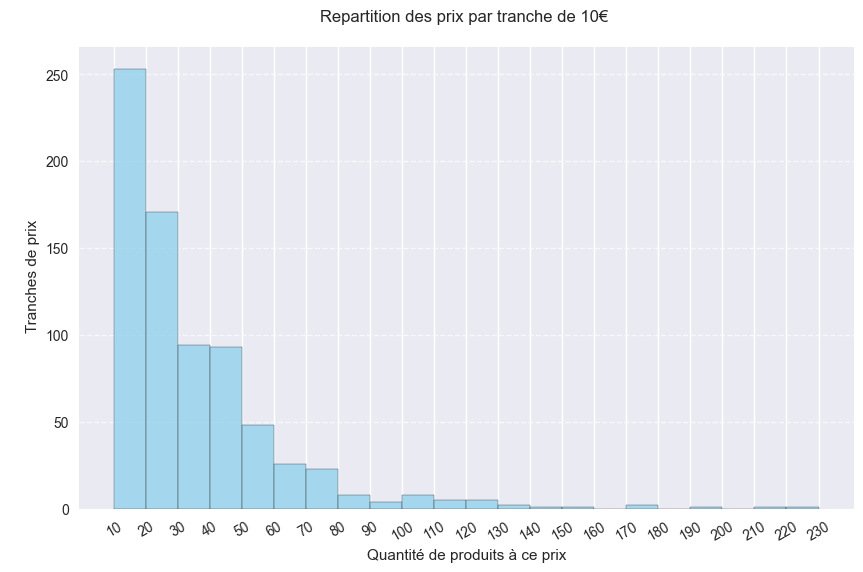

In [189]:
plt.figure(figsize=(10, 6))

plt.hist(df_erp['price'], bins=range(10, int(df_erp['price'].max()) + 10, 10), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Repartition des prix par tranche de 10€ \n')
plt.xlabel('Quantité de produits à ce prix')
plt.ylabel('\n Tranches de prix')

plt.xticks(range(10, int(df_erp['price'].max()) + 10, 10), rotation = 30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./Graph/repartition_erp_tranche_10.png', bbox_inches='tight')

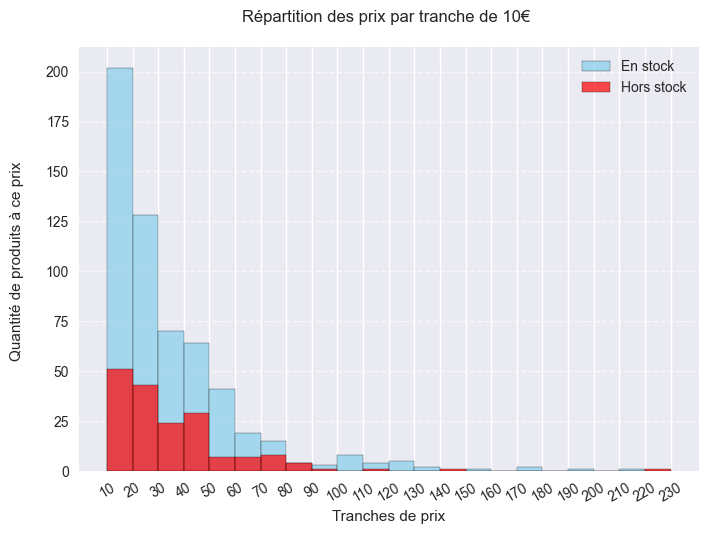

In [190]:
df_instock = df_erp[df_erp['stock_status'] == 'instock']
df_outstock = df_erp[df_erp['stock_status'] == 'outofstock']

plt.hist(df_instock['price'], bins=range(10, int(df_erp['price'].max()) + 10, 10), color='skyblue', edgecolor='black', alpha=0.7, label='En stock')
plt.hist(df_outstock['price'], bins=range(10, int(df_erp['price'].max()) + 10, 10), color='red', edgecolor='black', alpha=0.7, label='Hors stock')

plt.title('Répartition des prix par tranche de 10€ \n')
plt.xlabel('Tranches de prix')
plt.ylabel('Quantité de produits à ce prix \n')
plt.xticks(range(10, int(df_erp['price'].max()) + 10, 10), rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.savefig('./Graph/repartion_erp_tranche_10_stock.png',bbox_inches='tight')
plt.show()

______________
## liaison 

In [191]:
df_liaison.dtypes 

product_id     int64
id_web        object
dtype: object

In [192]:
df_liaison['product_id'] = df_liaison['product_id'].astype(str)
df_liaison = df_liaison.rename(columns={'id_web' : 'sku'})

print('valeurs nulles :')
print('product_id :', df_liaison['product_id'].isna().sum())
print('sku :', df_liaison['sku'].isna().sum(), '\n')


print('doublon :')
print('product_id :', df_liaison['product_id'].duplicated().sum())
print('sku :', df_liaison[~df_liaison['sku'].isna()].duplicated().sum())

valeurs nulles :
product_id : 0
sku : 91 

doublon :
product_id : 0
sku : 0


In [193]:
df_liaison[df_liaison['sku'].isna()].head()

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN


C'est tout à fait logique, lorsque sku est NaN, ça devrait normalement dire que le produit n'est pas dispo sur le site web

In [194]:
df_erp_l = df_erp.merge(df_liaison, on = 'product_id', how = 'left')
df_erp_l

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,True,24.2,0,outofstock,15298
1,3849,True,34.3,0,outofstock,15296
2,3850,True,20.8,0,outofstock,15300
3,4032,True,14.1,0,outofstock,19814
4,4039,True,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,False,45.0,30,instock,NaN
821,7204,False,45.0,9,instock,NaN
822,7247,True,54.8,23,instock,13127-1
823,7329,False,26.5,14,instock,14680-1


Pas de sku sans product id 

In [195]:
df_erp_l[(~df_erp_l['sku'].isna()) & (df_erp_l['product_id'].isna())].shape[0]

0

sku = 13127-1 ????????? 

In [196]:
df_erp[df_erp['product_id'] == '7247']

,product_id,onsale_web,price,stock_quantity,stock_status
822,7247,True,54.8,23,instock


In [197]:
df_liaison[(~df_liaison['sku'].isna()) &(df_liaison['sku'].str.contains('13127'))]

,product_id,sku
822,7247,13127-1


In [198]:
df_web[(~df_web['sku'].isna()) &(df_web['sku'].str.contains('13127'))]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
490,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
503,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Bon, ça existe... doublon mais ça existe. 

------
## web 

In [199]:
df_web.head(1)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,NaN,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,NaN,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Beaucoup de colonnes, sûrement trop 

In [200]:
df_web.dtypes 

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [201]:
df_web.shape

(1513, 28)

In [202]:
print(((df_web['sku'].isna().sum() / df_web.shape[0]) *100).round(1), '% de la colonne sku est vide, soit', df_web['sku'].isna().sum(), 'références')

5.6 % de la colonne sku est vide, soit 85 références


On explore et on fait un premier tri dans les colonnes à conserver ou non 

In [203]:
df_web['total_sales'] = df_web['total_sales'].astype('Int64')

df_web['sku'].describe() #1428, une centaine sans id, mais seulement 714 unique, donc doublons partout (freq 2)
df_web['total_sales'].describe() #C'est logique : min = 0, max = 96
df_web['post_date'].describe() #min 2018, max 2020, count 1430
df_web['post_title'].describe() #1430 occurences, ça fait une centaine de produits sans titre
df_web['post_excerpt'].describe() #commentaires, 716 val, on conserve
df_web['post_name'].describe() #Comme post_title, format différent

df_web['post_type'].value_counts() #Ca va servir à nettoyer les attachment qui sont des doublons

df_web_1 = df_web[(~df_web['sku'].isna()) & (df_web['post_type'] == 'product')]


df_web_1['virtual'].value_counts() #uniquement 0, on va s'en débarasser
df_web_1['downloadable'].value_counts() #0 
df_web_1['rating_count'].value_counts() #0
df_web_1['average_rating'].value_counts() #0
df_web_1['tax_class'].value_counts() #Vide
df_web_1['post_author'].value_counts() #2x 1.0, sinon 1428 2.0, passer en int + voir ce que ça représente
df_web_1['post_content'].describe() #vide
df_web_1['post_status'].value_counts() #1430 publish, tout les posts ont été publish, logique. Donc pas necessaire de la conserver
df_web_1['comment_status'].value_counts() #1430 clos... 
df_web_1['ping_status'].value_counts() #1430 clos
df_web_1['post_password'].value_counts() #vide
df_web_1['post_content_filtered'].value_counts() #vide
df_web_1['post_parent'].value_counts() #1430 0
df_web_1['menu_order'].describe() #0
df_web_1['tax_status'].value_counts() #ils sont tous taxable
df_web_1['comment_count'].describe() #0 
df_web_1['guid'].describe() #lien du site, 1430 dont 1429 unique
df_web_1['post_mime_type'].describe() #vide
df_web_1['post_date_gmt'].describe() #même chose
df_web_1['post_modified'].describe() #date modif
df_web_1['post_modified_gmt'].describe()



df_web_prep = df_web_1.drop(columns = ['virtual', 'downloadable', 'rating_count','average_rating', 'tax_class','post_author',
                                     'post_content', 'post_status', 'comment_status', 'ping_status', 'post_password', 
                                     'post_content_filtered', 'post_parent', 'menu_order', 'comment_count', 'post_type', 'tax_status', 
                                     'guid', 'post_mime_type', 'post_date_gmt', 'post_modified', 'post_modified_gmt'])
df_web_prep

,sku,total_sales,post_date,post_title,post_excerpt,post_name
2,15075,3,2018-02-14 15:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,pares-balta-penedes-indigena-2017
3,16209,6,2018-02-14 17:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",maurel-cabardes-tradition-2017
5,13895,0,2019-03-19 10:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",chateau-saransot-dupre-bordeaux-blanc-2016
6,12857,0,2018-04-12 17:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,chateau-de-puligny-montrachet-1cru-champ-canet...
9,14106,0,2019-06-08 09:54:21,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,stephane-tissot-chateau-chalon-2011
...,...,...,...,...,...,...
1501,15941,4,2018-02-12 14:26:52,Domaine de la Jérôme Côtes du Rhône Village 201,"Un vin opulent, à la texture onctueuse, et tou...",jerome-cotes-du-rhone-2018
1503,10459,0,2018-04-13 15:58:19,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",alphonse-mellot-sancerre-rouge-generation-xix-...
1507,16320,3,2018-02-12 12:49:29,Mourgues du Grès IGP Pont du Gard Terre d'Arge...,"Magnifique exemple d’assemblage réussi, ou cha...",mourgues-du-gres-costieres-de-nimes-terre-darg...
1509,15663,3,2018-02-27 10:27:01,Chermette Domaine du Vissoux Brouilly Pierreux...,Le Brouilly est le plus méridional des crus du...,chermette-domaine-du-vissoux-brouilly-pierreux...


On recherche les deux post qui n'avaient pas de sku 

In [204]:
web_sans_sku = df_web[df_web['sku'].isna()]
web_sans_sku[~web_sans_sku['post_name'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


2 produits différents, voire s'il y a d'autres Pierre Jean Villa 

In [205]:
df_web_prep[(~df_web_prep['post_title'].isna()) & (df_web_prep['post_title'].str.contains('Pierre Jean Villa'))]

,sku,total_sales,post_date,post_title,post_excerpt,post_name
29,19815,0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017
365,19814,3,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018
522,15298,6,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
833,15300,0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...
1015,15303,0,2018-02-12 09:13:35,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,"Roussanne finement exotique, atypique par sa v...",pierre-jean-villa-saint-joseph-saut-ange-2018
1375,15296,0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017


Ca aide pas. 

Idées explo bonus : Faire des groupes par maisons et d'autres par années (décorélé de l'année de publication sur le site )

In [206]:
df_web_prep.head(10)

,sku,total_sales,post_date,post_title,post_excerpt,post_name
2,15075,3,2018-02-14 15:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,pares-balta-penedes-indigena-2017
3,16209,6,2018-02-14 17:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",maurel-cabardes-tradition-2017
5,13895,0,2019-03-19 10:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",chateau-saransot-dupre-bordeaux-blanc-2016
6,12857,0,2018-04-12 17:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,chateau-de-puligny-montrachet-1cru-champ-canet...
9,14106,0,2019-06-08 09:54:21,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,stephane-tissot-chateau-chalon-2011
10,13996,2,2019-07-25 09:09:17,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",domaine-des-comtes-lafon-volnay-1er-cru-santen...
15,15428,7,2018-02-20 10:40:13,Domaine Saint-Denis Mâcon Lugny 2017,"Un très joli Mâcon sur la fraîcheur, net et éq...",st-denis-macon-lugny-2017
20,7033,4,2019-03-13 13:44:44,Huile d'Olive Extra Vierge Planeta Selezione C...,Récoltées entre le 15 octobre et le 30 novembr...,huile-olive-planeta-3l
22,16077,37,2019-07-24 09:33:52,Domaine Giudicelli Patrimonio Rouge 2016,100% Nielluccio ce Patrimonio présente un nez ...,domaine-giudicelli-patrimonio-rouge-2016
23,16237,36,2018-02-13 14:13:53,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015


In [207]:
df_web_prep.loc[20,'post_name']

'huile-olive-planeta-3l'

- Ouais alors... il a pas trop sa place au milieu des vins surtout pour les recherches qu'on souhaite mener 

- <span id="u689-24">Clos Baquey</span>  est  tr...	 erreur encodage, bon. 

In [208]:
df_web_prep['Annee'] = df_web_prep['post_name'].str.split('-').str[-1]
df_web_prep['Annee'].describe()

count      714
unique      71
top       2017
freq       182
Name: Annee, dtype: object

71 années uniques ? Ouais non. 

In [209]:
df_web_prep['Annee'].value_counts()

Annee
2017       182
2018       150
2016       110
2019        63
2015        56
          ... 
chest        1
elcho        1
blanc        1
euros        1
dalsace      1
Name: count, Length: 71, dtype: int64

In [210]:
df_web_prep[df_web_prep['post_name'].str.contains('chest')]
df_web_prep.loc[695, 'post_title']

'Wemyss Malts Blended Malt Scotch Whisky Treacle Chest'

Je suis un fainéant, on va y aller au nlp. 

Plus tard. 

In [218]:
df_erp_l_prep = df_erp_l[(~df_erp_l['sku'].isna()) & (df_erp_l['onsale_web'] == True)]
print(df_erp_l_prep['product_id'].isna().sum())
print(df_erp_l_prep['sku'].isna().sum())

print(df_erp_l_prep.shape[0])
print(df_web_prep.shape[0])

0
0
714
714


La table web n'est pas parfaitement complete. On va se baser sur le df liaison pour le join, c'est pas grave si on a pas le titre d'un sku. 

In [221]:
df_total_prep = df_erp_l_prep.merge(df_web_prep, on = 'sku', how = 'left')
df_total = df_total_prep[['price', 'stock_quantity', 'stock_status', 'total_sales', 'post_date', 'post_title', 'post_excerpt', 'post_name']]
df_total

,price,stock_quantity,stock_status,total_sales,post_date,post_title,post_excerpt,post_name
0,24.2,0,outofstock,6,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
1,34.3,0,outofstock,0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017
2,20.8,0,outofstock,0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...
3,14.1,0,outofstock,3,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018
4,46.0,0,outofstock,0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...,...,...,...,...
709,8.4,83,instock,5,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,mouthes-le-bihan-aime-chai-2015
710,27.5,15,instock,0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,camin-larredya-jurancon-sec-la-virada-2018
711,69.0,2,instock,0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",jamet-cote-rotie-fructus-voluptas-2018
712,54.8,23,instock,0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2


Notes : 

- Anomalies join 
- Reverifier que les tables ont des pk uniques
- Formaliser dans le notebook les erreurs / bug + décision prise et pourquoi 
- Listes des axes d'amelioration 

Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.